<a name='0'></a>
# Taxis Dataset


* [1. Problem formulation](#1)
* [2. Collecting the data](#2)
* [3. Exploraroty Data Analysis](#3)
* [4. Data Processing](#4)
* [5. Choosing and Training a model](#5)
* [6. Evaluating a model](#6)
* [7. Evaluating the Model on the Test Set](#7)
* [8. Conclusion](#8)

<a name='1'></a>

## 1. Problem Formulation

Dataset Taxis berisi informasi yang dimiliki oleh perusahaan taksi berupa tarif, jarak, penumpang, & penghasilan supir. Sebagai data scientist diminta untuk memprediksi tip yang didapat oleh supir dengan membangun machine learning menggunakan model linear regression.

<a name='2'></a>

## 2. Collecting the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
taxis = sns.load_dataset('taxis')

In [3]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [4]:
taxis.shape

(6433, 14)

In [5]:
taxis['pickup'] = pd.to_datetime(taxis['pickup'])

In [6]:
taxis['pickup_year'] = taxis['pickup'].dt.year
taxis['pickup_month'] = taxis['pickup'].dt.month
taxis['pickup_hour'] = taxis['pickup'].dt.hour
taxis['pickup_date'] = taxis['pickup'].dt.day
taxis['pickup_dow'] = taxis['pickup'].dt.dayofweek

In [7]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_year,pickup_month,pickup_hour,pickup_date,pickup_dow
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019,3,20,23,5
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019,3,16,4,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019,3,17,27,2
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019,3,1,10,6
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019,3,13,30,5


In [8]:
taxis.tail()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_year,pickup_month,pickup_hour,pickup_date,pickup_dow
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,2019,3,9,31,6
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,2019,3,17,31,6
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,2019,3,22,23,5
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,2019,3,10,4,0
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn,2019,3,19,13,2


In [9]:
taxis.isna().sum()/len(taxis)*100

pickup             0.000000
dropoff            0.000000
passengers         0.000000
distance           0.000000
fare               0.000000
tip                0.000000
tolls              0.000000
total              0.000000
color              0.000000
payment            0.683973
pickup_zone        0.404166
dropoff_zone       0.699518
pickup_borough     0.404166
dropoff_borough    0.699518
pickup_year        0.000000
pickup_month       0.000000
pickup_hour        0.000000
pickup_date        0.000000
pickup_dow         0.000000
dtype: float64

<a name='3'></a>

## 3. Exploratory Data Analysis

In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(taxis, test_size=0.1,random_state=20)

In [11]:
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 5789 
The size of testing data is: 644


### Checking data statistics

In [12]:
train_data.describe(include='all').transpose()

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
pickup,5789,5773,2019-03-28 08:21:02,2,2019-02-28 23:29:03,2019-03-31 23:43:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff,5789,5782,2019-03-01 19:18:55,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passengers,5789.0,NaN,NaN,NaN,NaT,NaT,1.536189,1.200068,0.0,1.0,1.0,2.0,6.0
distance,5789.0,NaN,NaN,NaN,NaT,NaT,3.020888,3.820907,0.0,0.97,1.63,3.22,36.7
fare,5789.0,NaN,NaN,NaN,NaT,NaT,13.079128,11.615997,1.0,6.5,9.0,15.0,150.0
tip,5789.0,NaN,NaN,NaN,NaT,NaT,1.980869,2.470192,0.0,0.0,1.66,2.76,33.2
tolls,5789.0,NaN,NaN,NaN,NaT,NaT,0.314873,1.39418,0.0,0.0,0.0,0.0,24.02
total,5789.0,NaN,NaN,NaN,NaT,NaT,18.503916,13.896511,1.3,10.8,14.15,20.3,174.82
color,5789,2,yellow,4910,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment,5748,2,credit card,4097,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking Missing Values

In [13]:
train_data.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            41
pickup_zone        23
dropoff_zone       40
pickup_borough     23
dropoff_borough    40
pickup_year         0
pickup_month        0
pickup_hour         0
pickup_date         0
pickup_dow          0
dtype: int64

In [14]:
print('The Percentage of missing values in payment is: {}%'.format(train_data.isnull().sum()['payment'] / len(train_data) * 100))

The Percentage of missing values in payment is: 0.7082397650716877%


### Removing Noise Features

In [15]:
train_data.drop(columns=['dropoff','pickup','tolls','pickup_year','dropoff_borough','pickup_borough','dropoff_zone','pickup_zone','pickup_month'],axis=1,inplace=True)

### Checking Values in the Categorical Feature(s)

In [16]:
set(train_data.columns) - set(train_data.describe().columns) # how to find categorical column

{'color', 'payment'}

<AxesSubplot:xlabel='color', ylabel='count'>

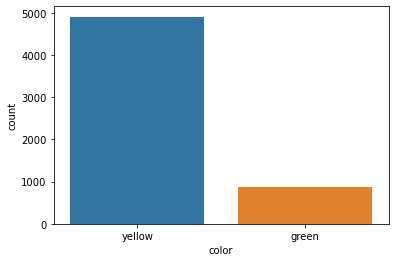

In [17]:
sns.countplot(data=train_data, x='color')

In [18]:
train_data.drop(['color'],axis=1,inplace=True)

<AxesSubplot:xlabel='payment', ylabel='count'>

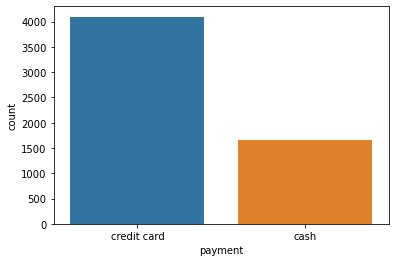

In [19]:
sns.countplot(data=train_data, x='payment')

### Checking Correlation Between Features

In [20]:
correlation = train_data.corr()
correlation['tip']

passengers     0.017600
distance       0.454803
fare           0.496169
tip            1.000000
total          0.652495
pickup_hour    0.032075
pickup_date    0.016816
pickup_dow    -0.025106
Name: tip, dtype: float64

<AxesSubplot:>

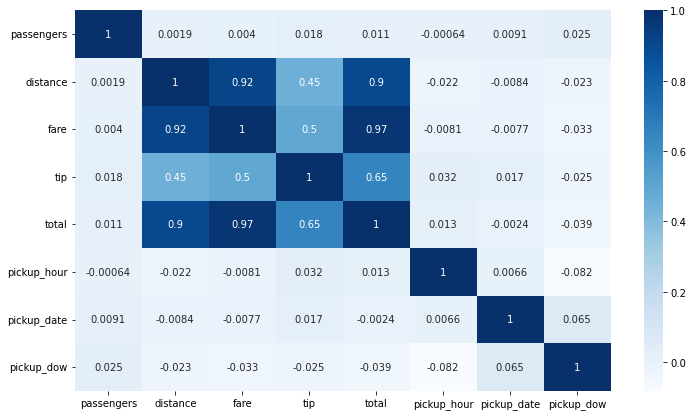

In [23]:
plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap="Blues")

### Exploring Relationship Between Individual Features

Below is the relationship between tip and distance group by payment. 

<AxesSubplot:xlabel='tip', ylabel='distance'>

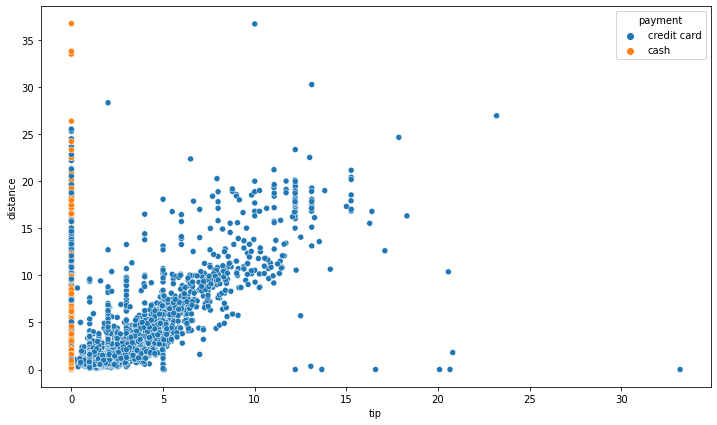

In [24]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='tip', y='distance', hue='payment')

distance = 0 tapi tip kok tinggi banget? itu berarti noise di row level, boleh diremove aja

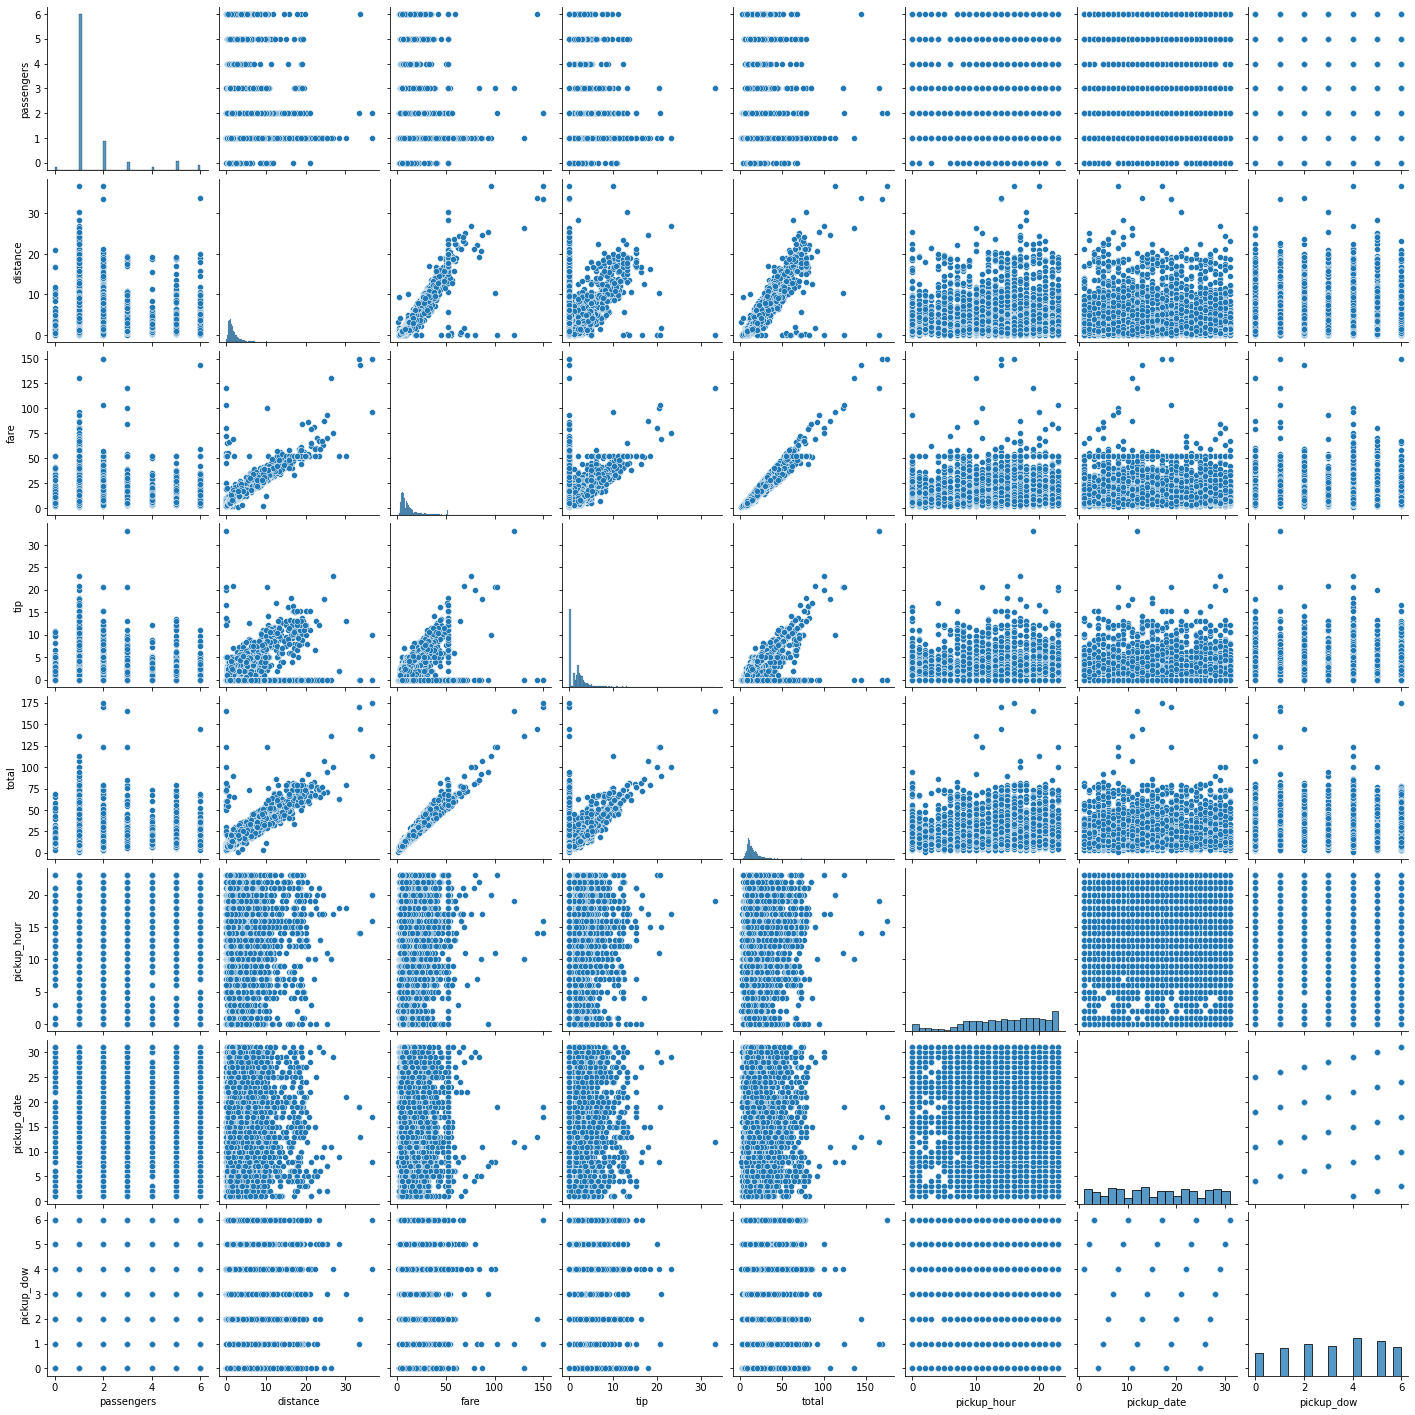

In [25]:
sns.pairplot(train_data)

<a name='4'></a>

## 4. Data Preprocessing 

In this part, it's where we prepare the data to be in proper format that will be accepted by the ML model. The processing functions that we apply to training set must also be applied to the test set.

Here are three most things that we will take care of in our dataset:

* Missing values
* Encoding categorical features 
* Scaling numerical features


As much as we can we will use functions so that we can rerun the same transformations on the test set. 

### Handling Missing Values


In [26]:
training_input_data = train_data
training_input_data

,passengers,distance,fare,tip,total,payment,pickup_hour,pickup_date,pickup_dow
1570,1,1.20,8.0,2.25,13.55,credit card,9,7,3
1571,5,0.64,5.0,0.00,9.30,cash,16,5,1
4518,2,1.16,9.5,0.00,12.80,cash,14,6,2
1541,2,2.90,12.5,3.25,19.55,credit card,21,14,3
5384,1,0.68,5.0,0.00,8.30,cash,12,28,3
...,...,...,...,...,...,...,...,...,...
5910,1,1.12,7.5,0.00,9.30,credit card,16,20,2
3915,3,3.03,17.0,0.00,20.30,cash,10,5,1
1428,2,1.19,7.5,2.70,13.50,credit card,12,28,3
4367,3,0.95,5.0,0.00,8.30,cash,13,4,0


In [27]:
training_input_data.isna().sum()

passengers      0
distance        0
fare            0
tip             0
total           0
payment        41
pickup_hour     0
pickup_date     0
pickup_dow      0
dtype: int64

In [28]:
cond = training_input_data['tip'] == 0.0
training_input_data['payment'] = training_input_data['payment'].fillna(cond.map({True:'cash', False:'credit card'}))

In [29]:
training_input_data.isna().sum()

passengers     0
distance       0
fare           0
tip            0
total          0
payment        0
pickup_hour    0
pickup_date    0
pickup_dow     0
dtype: int64

In [30]:
training_input_data = training_input_data.drop('tip', axis=1)
training_labels = train_data['tip']

### Encoding Categorical Features

Categorical features are features which have categorical values. An example in our dataset is `payment` that has the following values.

In [31]:
set(training_input_data.columns) - set(training_input_data.describe().columns) # how to find categorical column

{'payment'}

In [32]:
training_input_data['payment'].value_counts()

credit card    4097
cash           1692
Name: payment, dtype: int64

#### Ordinary Encoding

In [33]:
from sklearn.preprocessing import OrdinalEncoder

cats_feats = training_input_data[['payment']]

encoder = OrdinalEncoder()

cats_encoded = encoder.fit_transform(cats_feats)

In [34]:
cats_encoded

# cash = 0
# credit card = 1

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

In [35]:
cats_encoded_df = pd.DataFrame(cats_encoded, columns=cats_feats.columns, index=cats_feats.index)

In [36]:
cats_encoded_df

,payment
1570,1.0
1571,0.0
4518,0.0
1541,1.0
5384,0.0
...,...
5910,1.0
3915,0.0
1428,1.0
4367,0.0


In [37]:
training_input_data[['payment']] = cats_encoded_df
training_input_data.head()

,passengers,distance,fare,total,payment,pickup_hour,pickup_date,pickup_dow
1570,1,1.20,8.0,13.55,1.0,9,7,3
1571,5,0.64,5.0,9.30,0.0,16,5,1
4518,2,1.16,9.5,12.80,0.0,14,6,2
1541,2,2.90,12.5,19.55,1.0,21,14,3
5384,1,0.68,5.0,8.30,0.0,12,28,3


### Scaling Numerical features

After we have imputed missing values, and converted categorical features into numbers, it's time to scale the numerical features. 

But why do we have to scale numerical features? Most machine learning models will work well when given small input values, and best if they are in the same range. 

We use Normalization where the features are scaled to values between 0 and 1 with`MinMaxScaler`.

In [38]:
num_feats = training_input_data.drop('payment', axis=1)

In [39]:
num_feats.columns

Index(['passengers', 'distance', 'fare', 'total', 'pickup_hour', 'pickup_date',
       'pickup_dow'],
      dtype='object')

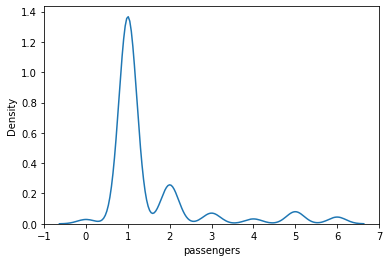

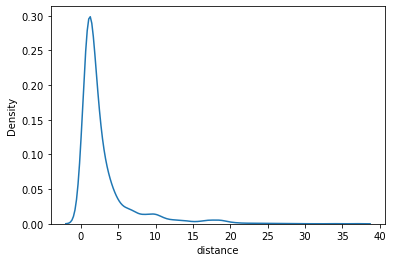

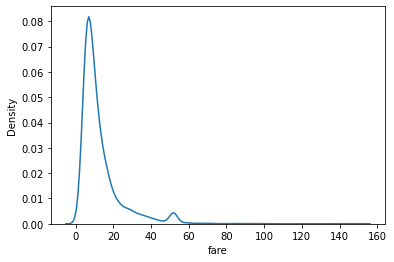

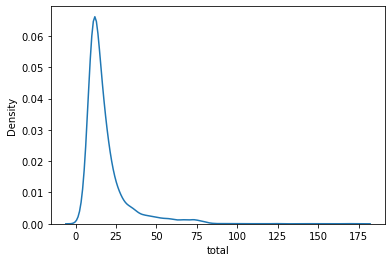

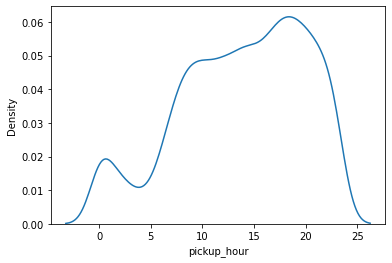

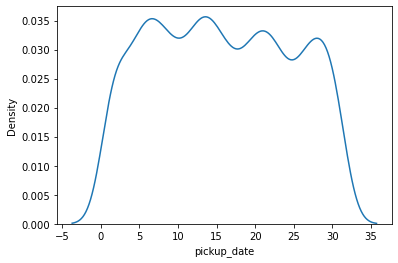

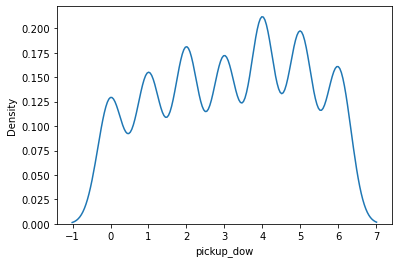

In [40]:
for i in num_feats.columns:
    sns.kdeplot(num_feats[i])
    plt.show()

In [41]:
num_feats = num_feats.drop(columns=['pickup_date','pickup_dow'], axis=1)

In [42]:
num_feats.columns

Index(['passengers', 'distance', 'fare', 'total', 'pickup_hour'], dtype='object')

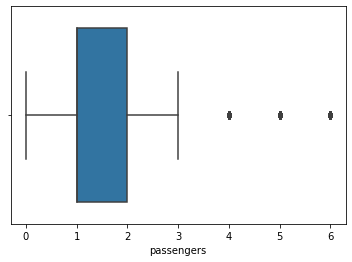

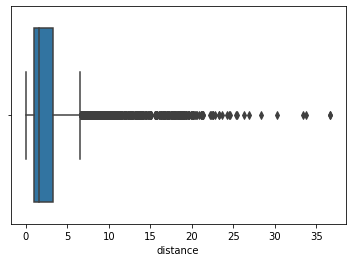

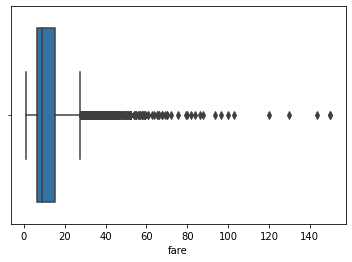

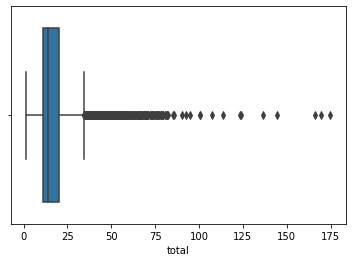

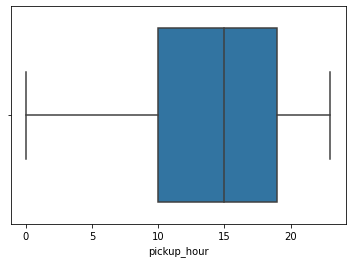

In [43]:
for i in num_feats.columns:
    sns.boxplot(num_feats[i])
    plt.show()

#### Normalization

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled

array([[0.16666667, 0.03269755, 0.04697987, 0.07059705, 0.39130435],
       [0.83333333, 0.01743869, 0.02684564, 0.0461042 , 0.69565217],
       [0.33333333, 0.03160763, 0.05704698, 0.06627478, 0.60869565],
       ...,
       [0.33333333, 0.03242507, 0.04362416, 0.0703089 , 0.52173913],
       [0.5       , 0.02588556, 0.02684564, 0.04034117, 0.56521739],
       [0.33333333, 0.03923706, 0.04697987, 0.07411249, 0.86956522]])

In [45]:
cats_encoded_df

,payment
1570,1.0
1571,0.0
4518,0.0
1541,1.0
5384,0.0
...,...
5910,1.0
3915,0.0
1428,1.0
4367,0.0


In [46]:
training_data_preprocessed = pd.DataFrame(num_scaled, columns = num_feats.columns, index = num_feats.index)

In [47]:
training_data_preprocessed['payment'] = cats_encoded_df

In [48]:
training_data_preprocessed.head()

,passengers,distance,fare,total,pickup_hour,payment
1570,0.166667,0.032698,0.046980,0.070597,0.391304,1.0
1571,0.833333,0.017439,0.026846,0.046104,0.695652,0.0
4518,0.333333,0.031608,0.057047,0.066275,0.608696,0.0
1541,0.333333,0.079019,0.077181,0.105175,0.913043,1.0
5384,0.166667,0.018529,0.026846,0.040341,0.521739,0.0


In [49]:
training_data_preprocessed.isna().sum()

passengers     0
distance       0
fare           0
total          0
pickup_hour    0
payment        0
dtype: int64

<a name='5'></a>

## 5. Choosing and Training a model

You have probably heard the notion that a machine learning is only 5% or so of the whole ML project, the rest percentage being for data processing. And that is true, we have spent a lot of time dealing with data. 

Let's get that 5% percent done!! We will use Linear Regression model which is available in sklearn. 

In [50]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

In [51]:
training_labels

1570    2.25
1571    0.00
4518    0.00
1541    3.25
5384    0.00
        ... 
5910    0.00
3915    0.00
1428    2.70
4367    0.00
2522    2.36
Name: tip, Length: 5789, dtype: float64

In [52]:
reg_model.fit(training_data_preprocessed, training_labels)

LinearRegression()

In [53]:
training_data_preprocessed.head()

,passengers,distance,fare,total,pickup_hour,payment
1570,0.166667,0.032698,0.046980,0.070597,0.391304,1.0
1571,0.833333,0.017439,0.026846,0.046104,0.695652,0.0
4518,0.333333,0.031608,0.057047,0.066275,0.608696,0.0
1541,0.333333,0.079019,0.077181,0.105175,0.913043,1.0
5384,0.166667,0.018529,0.026846,0.040341,0.521739,0.0


In [54]:
training_labels.head()

1570    2.25
1571    0.00
4518    0.00
1541    3.25
5384    0.00
Name: tip, dtype: float64

In [55]:
reg_model.coef_

array([-6.79884531e-02, -3.64027394e+00, -7.46086312e+01,  9.41891794e+01,
       -3.34135831e-01,  9.69987391e-01])

In [56]:
reg_model.intercept_

-1.4774092461326536

<a name='6'></a>

## 6. Model Evaluation

Let's evaluate how good is the model on the few examples from the training set. 

There are 3 main evaluation metrics for the regression models. These are: 

* **Mean Squared Error (MSE)**

*Formula*: 

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

* **Root Mean Squared Error(RMSE)**

*Formula*: 

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

* **Mean Absolute Error (MAE)**

*Formula*: 

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$



In [57]:
from sklearn.metrics import mean_squared_error

predictions = reg_model.predict(training_data_preprocessed)

In [58]:
mse = mean_squared_error(training_labels, predictions)

rmse = np.sqrt(mse)
rmse 

0.9716729655922666

#### Comparing prediction and the actual data

In [59]:
preds = pd.DataFrame(predictions, index = training_labels.index, columns=['pred'])

In [60]:
preds['act'] = training_labels # act means actual

In [61]:
preds.describe()

,pred,act
count,5789.000000,5789.000000
mean,1.980869,1.980869
std,2.271022,2.470192
min,-2.005195,0.000000
25%,0.282569,0.000000
50%,2.053546,1.660000
75%,2.830464,2.760000
max,28.997355,33.200000


<AxesSubplot:xlabel='act', ylabel='pred'>

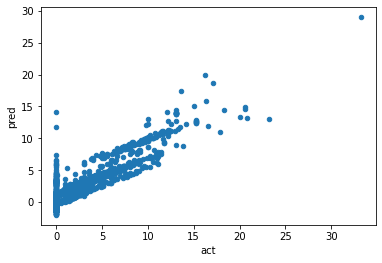

In [62]:
preds.plot.scatter(x='act', y='pred')

#### Comparing MAE, MSE, and RMSE

In [63]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(training_labels, predictions)
mae

0.6179293317885355

In [64]:
mse

0.9441483520628701

In [65]:
rmse

0.9716729655922666

Diantara ketiga evaluation metric untuk train data, nilai **MAE** yang paling mendekati 0 yaitu `0.617`.

### Model evaluation with cross validation

We can also use cross validation to divide the training data into different folds or subsets of training and validation. By training and validating the model into a number of folds, say 10, we will end up with 10 different score and we can average it. Note that the predictions are made on unseen subsets, so we can confidently say that the model didn't see the data it is being evaluated on. 

In [66]:
from sklearn.model_selection import cross_val_score

scoring = 'neg_root_mean_squared_error' 

scores = cross_val_score(reg_model, training_data_preprocessed, training_labels, scoring=scoring, cv=10)

In [67]:
scores = -scores

scores.mean()

0.9722442102484067

In [68]:
rmse

0.9716729655922666

In [69]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(reg_model, training_data_preprocessed, training_labels, cv=10)

In [70]:
mse_cross_val = mean_squared_error(training_labels, predictions)
rmse_cross_val = np.sqrt(mse_cross_val)
rmse_cross_val 

0.9773985881571061

In [71]:
mse_cross_val

0.9553080001315043

In [72]:
mae_cross_val = mean_absolute_error(training_labels, predictions)

In [73]:
mae_cross_val

0.6193335940695908

Diantara ketiga metode cross validation nilai **MAE** yang paling mendekati 0 yaitu `0.619`.

<a name='7'></a>

## 7. Evaluating the Model on the Test Set

In [74]:
test_data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_year,pickup_month,pickup_hour,pickup_date,pickup_dow
2509,2019-03-09 14:42:15,2019-03-09 14:55:56,1,1.06,9.5,1.00,0.0,13.80,yellow,credit card,Penn Station/Madison Sq West,West Chelsea/Hudson Yards,Manhattan,Manhattan,2019,3,14,9,5
5462,2019-03-23 23:49:00,2019-03-24 00:07:06,2,3.83,15.0,3.26,0.0,19.56,green,credit card,Downtown Brooklyn/MetroTech,Stuyvesant Heights,Brooklyn,Brooklyn,2019,3,23,23,5
4869,2019-03-01 21:42:07,2019-03-01 21:59:32,1,5.36,18.5,4.46,0.0,26.76,yellow,credit card,Financial District South,Clinton East,Manhattan,Manhattan,2019,3,21,1,4
5124,2019-03-30 07:57:26,2019-03-30 08:07:18,1,1.80,9.5,1.00,0.0,13.80,yellow,credit card,West Chelsea/Hudson Yards,Flatiron,Manhattan,Manhattan,2019,3,7,30,5
756,2019-03-22 18:48:22,2019-03-22 19:02:41,5,1.48,10.0,0.00,0.0,14.30,yellow,cash,Garment District,Midtown South,Manhattan,Manhattan,2019,3,18,22,4


#### Handling missing value

In [75]:
cond = test_data['tip'] == 0.0
test_data['payment'] = test_data['payment'].fillna(cond.map({True:'cash', False:'credit card'}))

In [76]:
test_data.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        3
dropoff_zone       5
pickup_borough     3
dropoff_borough    5
pickup_year        0
pickup_month       0
pickup_hour        0
pickup_date        0
pickup_dow         0
dtype: int64

#### Removing Noise Features

In [77]:
test_data.drop(columns=['dropoff','pickup','tolls','pickup_year','dropoff_borough','pickup_borough','dropoff_zone','pickup_zone','pickup_month','color','pickup_dow','pickup_date'],axis=1,inplace=True)

In [78]:
test_data.head()

,passengers,distance,fare,tip,total,payment,pickup_hour
2509,1,1.06,9.5,1.00,13.80,credit card,14
5462,2,3.83,15.0,3.26,19.56,credit card,23
4869,1,5.36,18.5,4.46,26.76,credit card,21
5124,1,1.80,9.5,1.00,13.80,credit card,7
756,5,1.48,10.0,0.00,14.30,cash,18


#### Scaling Numerical Feature

In [79]:
test_input_data = test_data.drop('tip', axis=1)
test_labels = test_data['tip']

In [80]:
num_feats_test = test_input_data.drop('payment', axis=1)

In [81]:
num_feats_test

,passengers,distance,fare,total,pickup_hour
2509,1,1.06,9.5,13.80,14
5462,2,3.83,15.0,19.56,23
4869,1,5.36,18.5,26.76,21
5124,1,1.80,9.5,13.80,7
756,5,1.48,10.0,14.30,18
...,...,...,...,...,...
1980,1,3.53,15.0,22.56,20
4209,1,2.23,13.5,16.80,10
3258,1,1.10,6.5,12.25,10
4906,1,7.10,25.5,33.12,7


In [82]:
num_scaled_test = scaler.transform(num_feats_test)
num_scaled_test

array([[0.16666667, 0.02888283, 0.05704698, 0.07203781, 0.60869565],
       [0.33333333, 0.10435967, 0.09395973, 0.10523283, 1.        ],
       [0.16666667, 0.14604905, 0.11744966, 0.1467266 , 0.91304348],
       ...,
       [0.16666667, 0.02997275, 0.03691275, 0.06310512, 0.43478261],
       [0.16666667, 0.19346049, 0.16442953, 0.18337944, 0.30434783],
       [0.16666667, 0.25040872, 0.19798658, 0.24878976, 0.69565217]])

#### Encoding

In [83]:
from sklearn.preprocessing import OrdinalEncoder # not support missing values

cats_feats = test_input_data[['payment']]

encoder = OrdinalEncoder()

cats_encoded = encoder.fit_transform(cats_feats)

In [84]:
cats_encoded

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],

In [85]:
test_preprocessed = pd.DataFrame(num_scaled_test, columns = num_feats_test.columns, index = num_feats_test.index)

In [86]:
test_preprocessed['payment'] = cats_encoded

In [87]:
test_preprocessed

,passengers,distance,fare,total,pickup_hour,payment
2509,0.166667,0.028883,0.057047,0.072038,0.608696,1.0
5462,0.333333,0.104360,0.093960,0.105233,1.000000,1.0
4869,0.166667,0.146049,0.117450,0.146727,0.913043,1.0
5124,0.166667,0.049046,0.057047,0.072038,0.304348,1.0
756,0.833333,0.040327,0.060403,0.074919,0.782609,0.0
...,...,...,...,...,...,...
1980,0.166667,0.096185,0.093960,0.122522,0.869565,1.0
4209,0.166667,0.060763,0.083893,0.089327,0.434783,0.0
3258,0.166667,0.029973,0.036913,0.063105,0.434783,1.0
4906,0.166667,0.193460,0.164430,0.183379,0.304348,1.0


In [88]:
test_pred = reg_model.predict(test_preprocessed)
test_mse = mean_squared_error(test_labels,test_pred)

test_rmse = np.sqrt(test_mse)
test_rmse

0.965552259821685

In [89]:
test_mse

0.9322911664467627

In [90]:
test_mae = mean_absolute_error(test_labels,test_pred)

In [91]:
test_mae

0.5853923660362264

Diantara ketiga evaluation metric untuk test data, nilai **MAE** yang paling mendekati 0 yaitu `$0.585`.

<a name='8'></a>

## 8. Conclusion

In [95]:
con = pd.DataFrame({'mae':[mae,test_mae],
                    'mse':[mse,test_mse],
                    'rmse':[rmse,test_rmse]},
                   index=['train_data','test_data'])

con

,mae,mse,rmse
train_data,0.617929,0.944148,0.971673
test_data,0.585392,0.932291,0.965552


Setelah melalui serangkaian langkah dalam pembangunan machine learning menggunakan model **Linear Regression**, didapati bahwa model yang dibangun sudah cocok dengan metode *normalization* untuk *fetaure scaling*, *ordinary* untuk *encoding*, dan evaluasi training data terbaik menggunakan `MAE` dengan hasil `$0.617` karena lebih mendekati 0. Untuk test data evaluasi terbaik menggunakan `MAE` dengan hasil `$0.585`. Hal ini berarti bahwa model yang kami gunakan merupakan best model karena testing error < training error.